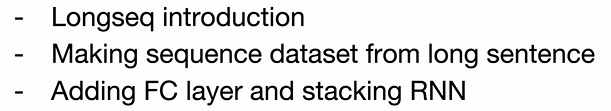

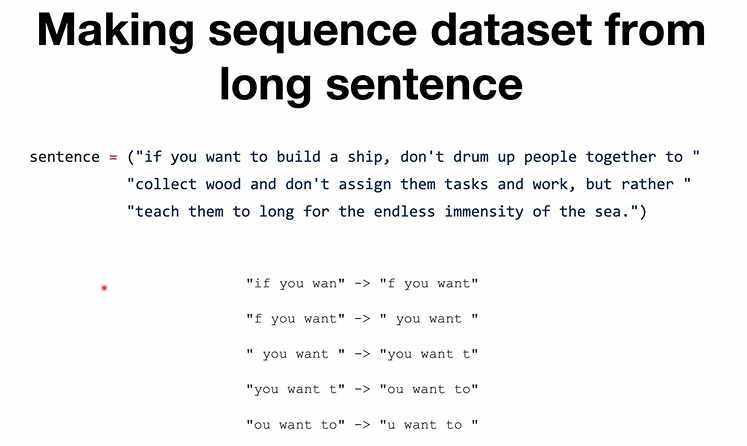

- 긴 문장을 일정 크기의 filter(?)를 이동하면서 sequence로 구성된 dataset을 만들어줌
- X -> Y 형태로 dataset을 구성해줌

In [1]:
import torch
import torch.optim as optim
import numpy as np

In [12]:
torch.manual_seed(0)

In [3]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [4]:
# unique 문자를 list 형태로 만들어준뒤, 각각에 대해 숫자index를 붙여줌
char_set = list(set(sentence))
char_dic = {c: i for i, c in enumerate(char_set)}

In [5]:
dic_size = len(char_dic)
hidden_size = len(char_dic)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1

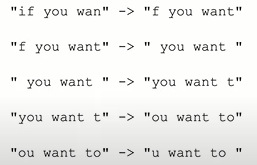

In [6]:
# data setting
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str])  # x str to index
    y_data.append([char_dic[c] for c in y_str])  # y str to index   # 여기까지가 사진처럼 출력되는 과정

x_one_hot = [np.eye(dic_size)[x] for x in x_data]  # 원핫 인코딩해줌

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [7]:
# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

<ipython-input-7-52579379b225>:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  X = torch.FloatTensor(x_one_hot)


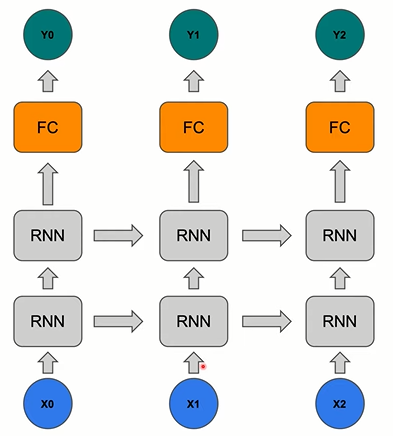

In [8]:
# declare RNN + FC
# 여기서는 Net이라는 상위 클래스 내에 하위 모델로 무엇이 있는지 init 함수를 통해 정의 (하위모델인 RNN, FC를 정의해줌)

class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True) 
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [9]:
# declare RNN + FC
# forward에서는 network가 어떻게 진행될지 정의해줌

class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x


net = Net(dic_size, hidden_size, 2)

In [10]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [11]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        # print(i, j, ''.join([char_set[t] for t in result]), loss.item())
        if j == 0:
            predict_str += ''.join([char_set[t] for t in result])
        else:
            predict_str += char_set[result[-1]]

    print(predict_str)

wssssswbswbba'bbswb bsws'bbsbb'bsbwassbbswbbsbwwab''bsbwwbwb'bs'wa'bwwb'bwwbwwbb'ssbwbssbbsab'wswbbs'sbbwwbs'b'swbsbbbswwwbwb'bwwwa'wsbb'ba'bbwsswwbwwb'swbassbbsbbwsbbbb'swb'wbssb
                                                                                                                                                                                   
tttotttotttttttttttttttttttttttttttttttttttttttttttttttttttttttttt tttttttttttttttttttttttttttttttt tttttttttttttttttttttttttttttttetttttttttttttttttttttt ttttttttttttt ttt tttttt
                                                                                                                                                    e                        e     
 s  dm  ss dididi s dididididididididi i di s didi dididi s didi did s di i dididididididi m di i midid dididididididididm s didididi i sid   idsididi  sidididididi i s  is s  idi
 a hst dp hdhst th  a ahat  ahd   ihdi tp t tp a thsp   tpahs  tp t tihd hdhe aouta i a  ah he  the 